In [6]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(seed=42) 

In [137]:
METADATADIR = os.path.join("/DATA", "ABCDFixRelease")
METADATADIRv4 = os.path.join("/DATA", "ABCD 4.0 Spreadsheets")
TASKDIR = "/DATA/ABCDTasks"

In [138]:
fs_qc_raw = pd.read_csv(f"{METADATADIR}/freesqc01.txt", sep="\t", skiprows=[1])
t2_qc = pd.read_csv(f"{METADATADIRv4}/abcd_t2wqc01.txt", sep="\t", skiprows=[1], usecols=["subjectkey", "t2w_postqc_qc"])
qc_raw = fs_qc_raw.merge(t2_qc, how="inner", on="subjectkey")
qc_raw.shape, qc_raw["subjectkey"].unique().shape

((18309, 23), (11238,))

In [139]:
t2_qc.t2w_postqc_qc.notna().sum(), t2_qc.query("t2w_postqc_qc != 0").t2w_postqc_qc.sum()

(541, 447.0)

In the t2w_postqc_qc 0 = reject ; 1 = accept according to https://nda.nih.gov/data_structure.html?short_name=abcd_t2wqc01

In [140]:
passed_all = qc_raw.query("eventname == 'baseline_year_1_arm_1' & \
                           fsqc_qc == 1 & fsqc_qu_pialover < 2 & fsqc_qu_wmunder < 2 & \
                           fsqc_qu_motion == 0 & fsqc_qu_artifact == 0 & t2w_postqc_qc != 0")
passed_all.shape

(7170, 23)

In [141]:
mri_raw = pd.read_csv(f"{DATADIR}/abcd_mri01.txt", sep="\t", skiprows=[1])

final_qc = mri_raw[["subjectkey", "mri_info_deviceserialnumber"]].merge(passed_all, how="inner", on="subjectkey")
scanner_counts = final_qc["mri_info_deviceserialnumber"].value_counts()
scanner_qc = scanner_counts[scanner_counts > 20].index
final_qc = final_qc[final_qc["mri_info_deviceserialnumber"].isin(scanner_qc)]
final_qc.shape

(12451, 24)

## CBCL Distribution

In [142]:
header = pd.read_csv(f"{TASKDIR}/abcd_cbcls01.txt", sep="\t")[:1]
header

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,1,2,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title
0,collection_id,abcd_cbcls01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Sex of the subject,The event name for which the data was collected,AnxDep CBCL Syndrome Scale (raw score),...,Sluggish Cognitive Tempo (SCT) CBCL Scale2007 ...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Stress CBCL Scale2007 Scale (raw score),Stress CBCL Scale2007 Scale (t-score),Stress CBCL Scale2007 Scale (missing values),Stress CBCL Scale2007 Scale (number of missing...,collection_title


In [143]:
raw = pd.read_csv(f"{TASKDIR}/abcd_cbcls01.txt", sep="\t", skiprows=[1])
raw.tail()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title
16821,2573,30568,19025,NDAR_INV0PRHUTZA,NDAR_INV0PRHUTZA,11/17/2016,129,M,baseline_year_1_arm_1,1.0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16822,2573,33179,19025,NDAR_INV20NDWAH8,NDAR_INV20NDWAH8,11/05/2017,115,M,baseline_year_1_arm_1,7.0,...,0.0,6.0,70.0,NaN,0.0,7.0,62.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16823,2573,34181,19025,NDAR_INVA4EVCYRA,NDAR_INVA4EVCYRA,03/04/2017,113,M,baseline_year_1_arm_1,3.0,...,0.0,2.0,55.0,NaN,0.0,7.0,62.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16824,2573,33205,19025,NDAR_INV24BT0Y26,NDAR_INV24BT0Y26,12/04/2017,113,M,baseline_year_1_arm_1,1.0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16825,2573,35228,19025,NDAR_INVCY51KY08,NDAR_INVCY51KY08,11/20/2017,118,M,baseline_year_1_arm_1,15.0,...,0.0,6.0,70.0,NaN,0.0,10.0,68.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...


In [144]:
baselines = raw.query("eventname == 'baseline_year_1_arm_1'")
assert baselines.shape[0] == raw["subjectkey"].unique().shape[0]

In [145]:
qc_passed = final_qc['subjectkey']
baselines = baselines[baselines["subjectkey"].isin(qc_passed)]
baselines.shape

(4603, 90)

In [146]:
t_score_cols = [x for x in raw.columns if re.match("cbcl_scr_syn_.*_t$", x)]
t_score_cols

['cbcl_scr_syn_anxdep_t',
 'cbcl_scr_syn_withdep_t',
 'cbcl_scr_syn_somatic_t',
 'cbcl_scr_syn_social_t',
 'cbcl_scr_syn_thought_t',
 'cbcl_scr_syn_attention_t',
 'cbcl_scr_syn_rulebreak_t',
 'cbcl_scr_syn_aggressive_t',
 'cbcl_scr_syn_internal_t',
 'cbcl_scr_syn_external_t',
 'cbcl_scr_syn_totprob_t']

In [147]:
summary_scales = [
  'cbcl_scr_syn_internal_t',
  'cbcl_scr_syn_external_t',
  'cbcl_scr_syn_totprob_t'
]
syndrome_scales = [
 'cbcl_scr_syn_anxdep_t',
 'cbcl_scr_syn_withdep_t',
 'cbcl_scr_syn_somatic_t',
 'cbcl_scr_syn_social_t',
 'cbcl_scr_syn_thought_t',
 'cbcl_scr_syn_attention_t',
 'cbcl_scr_syn_rulebreak_t',
 'cbcl_scr_syn_aggressive_t',
 
]

In [148]:
# header[t_score_cols].to_csv("scales.txt", header=None, index=False, sep="\n")

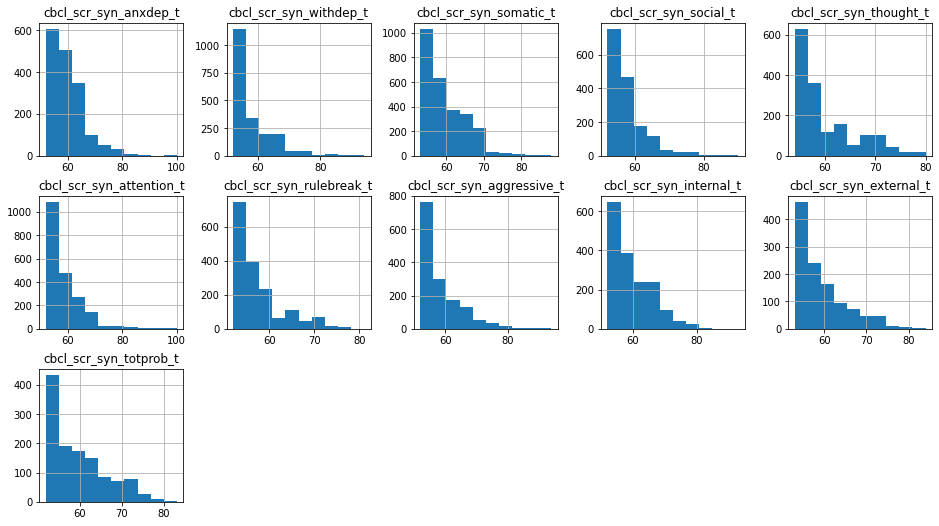

In [149]:
cbcl_scores = baselines[t_score_cols].copy()
right_tail = cbcl_scores[cbcl_scores > 51]
axs = right_tail.hist(figsize=(16,12), layout=(4,5))
# for ax in axs.flatten():
#     ax.set_xlim(55,None)
# plt.xlim(51,None)
plt.show()

In [150]:
cbcl_scores.shape

(4603, 11)

In [151]:
# According to orignal CBCL paper: https://pedsinreview.aappublications.org/content/21/8/265
# 67 ~= 96th Percentile
INLIER_THRESH = 66
summary_criteria = (cbcl_scores[summary_scales] < INLIER_THRESH).all(axis="columns")
syndrome_criteria = (cbcl_scores[syndrome_scales] < INLIER_THRESH).all(axis="columns") #.sum(axis="columns") <= 1
inlier_criteria = summary_criteria & syndrome_criteria
inliers = baselines[inlier_criteria]
inliers.shape

(3617, 90)

In [152]:
summary_criteria.sum(), syndrome_criteria.sum()

(4178, 3621)

In [153]:
# 70 ~= 98th Percentile
OUTLIER_THRESH = 70
summary_criteria = (cbcl_scores[summary_scales] > OUTLIER_THRESH).any(axis="columns") # In any  
syndrome_criteria = (cbcl_scores[syndrome_scales] > OUTLIER_THRESH).sum(axis="columns") >= 2
outlier_criteria = summary_criteria | syndrome_criteria
outliers = baselines[outlier_criteria]
outliers.shape

(217, 90)

In [154]:
summary_criteria.sum(), syndrome_criteria.sum()

(196, 138)

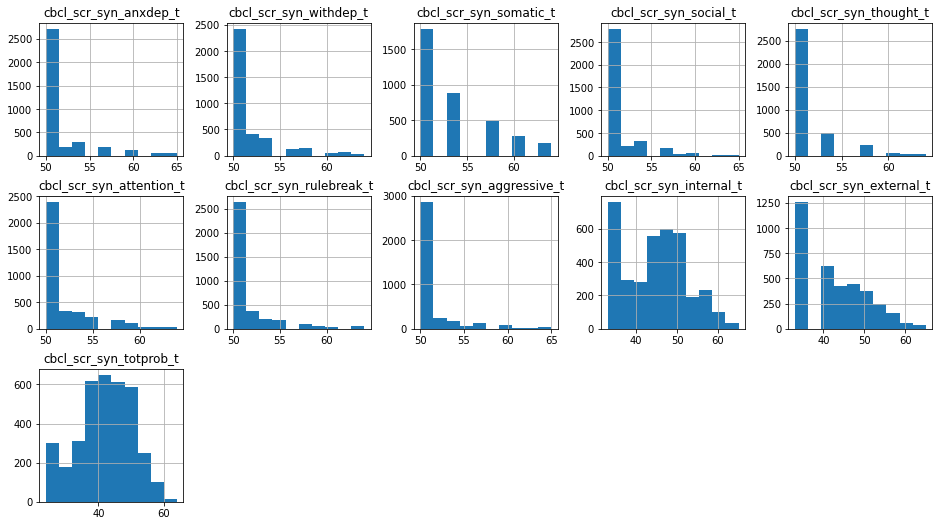

In [155]:
inliers[t_score_cols].hist(figsize=(16,12), layout=(4,5))
plt.show()

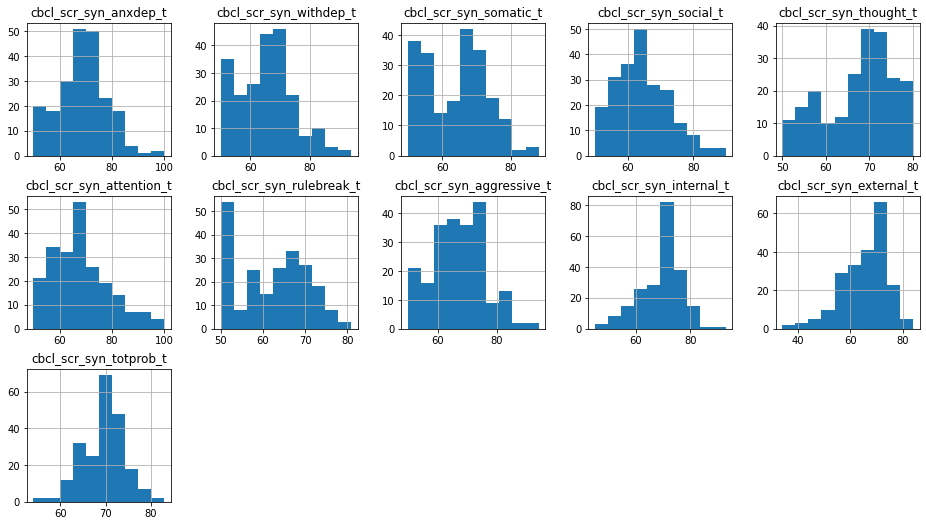

In [156]:
outliers[t_score_cols].hist(figsize=(16,12), layout=(4,5))
plt.show()

## Save selected subject IDs

> **INTERSECT WITH SUBJECTS THAT WE ACTUALLY HAVE ON DISK!!!**

In [81]:
import glob
R = re.compile(r"Data\/sub-(.*)\/ses-")
clean = lambda x: x.strip().replace("_", "")
t1_paths = glob.glob("/DATA/ImageData/Data/*/ses-baselineYear1Arm1/anat/*T1w.nii.gz")
t2_paths = glob.glob("/DATA/ImageData/Data/*/ses-baselineYear1Arm1/anat/*T2w.nii.gz")

In [82]:
_fn = lambda x: R.search(x).group(1).replace("NDAR", "NDAR_")
t1_ids = set(map(_fn, t1_paths))
t2_ids = set(map(_fn, t2_paths))
subject_ids = t1_ids.intersection(t2_ids)

In [83]:
len(t1_ids), len(t2_ids), len(subject_ids)

(3881, 3790, 3788)

In [157]:
on_disk = inliers["subjectkey"].isin(subject_ids)
on_disk.shape

(3617,)

In [158]:
inlier_keys = inliers["subjectkey"][on_disk]
inlier_keys.shape

(1238,)

In [159]:
outlier_keys = outliers["subjectkey"][outliers["subjectkey"].isin(subject_ids)]
outlier_keys.shape

(35,)

In [126]:
VAL_RATIO = 0.1

val_size = int(VAL_RATIO * len(inlier_keys))

validation = inlier_keys[:val_size]
testing = inlier_keys[val_size:val_size*2]
training = inlier_keys[val_size*2:]

In [127]:
assert np.sum((training.shape, validation.shape, testing.shape)) == inlier_keys.shape[0]
training.shape, validation.shape, testing.shape

((992,), (123,), (123,))

In [31]:
# training.to_csv("train_keys.txt", header=None, index=None)
# validation.to_csv("val_keys.txt", header=None, index=None)
# testing.to_csv("test_keys.txt", header=None, index=None)
# outlier_keys.to_csv("ood_keys.txt", header=None, index=None)

In [168]:
abcd_qc_passing_keys = pd.concat((training, validation, testing, outlier_keys))
abcd_qc_passing_keys.shape

(1273,)

In [169]:
abcd_qc_passing_keys

3313     NDAR_INVCF2VRU9R
3314     NDAR_INV305693H5
3334     NDAR_INV67LUTZ66
3338     NDAR_INVBLR3A9XC
3372     NDAR_INVGLL8G9PW
               ...       
15518    NDAR_INV95L3764E
15567    NDAR_INVKT7E0NA1
16418    NDAR_INV6ZTLWMWW
16662    NDAR_INV19BR9YHW
16746    NDAR_INVN1UYXP41
Name: subjectkey, Length: 1273, dtype: object

In [170]:
abcd_qc_passing_keys.to_csv("abcd_qc+cbcl_passing_keys.txt", header=None, index=None)